In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

# UCI 머신 러닝 저장소에서 유방암 데이터셋을 다운로드할 수 없을 때
# 다음 주석을 해제하고 로컬 경로에서 데이터셋을 적재하세요:

# df = pd.read_csv('wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
from IPython.display import Image

In [3]:
df.shape

(569, 32)

In [4]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, 2:].values
y = df.loc[:, 1].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [5]:
le.transform(['M', 'B'])
#사실 안바꿔도 알아서 잘 해준다고 함

array([1, 0])

In [6]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, 
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
print('테스트 정확도: %.3f' % pipe_lr.score(X_test, y_test))

#pipeline은 이런 식으로 머신러닝 모델처럼 같이 쓸 수 있다.
#fit 제공 및 preidct도 제공한다.
#동시에 정확도까지 제공
#Regression은 cost function (R^2)가 지표라면
#Classification은 Accuracy가 지표

테스트 정확도: 0.956


In [8]:
#pipeline의 make 메서드는 다음과 같이 클래스 이름의 소문자버전을 이름으로 만듬.

#pipe_lr2 = pipeline([("ss",StandardScaler()),
#                     ("pca", PCA(n_components=2)),
#                     ("lr", LogisticRegression(random_state=1))])


K 겹 교차 검증 혹은 홀드아웃 교차 검증은 모델의 일반화 성능, 즉 처음 본 데이터에 모델이 얼마나 잘 동작하는지 신뢰할만한 추정을 하도록 도와줌

No.1 HoldOut

홀드아웃방법은 초기 데이터셋을 별도의 훈련 데이터 셋과 테스트 데이터 셋으로 나눔.

전자는 모델 훈련에 사용, 후자는 일반화 성능을 추정하는 데 사용(Train Set  과 검증(Validation) Set)

** 모델 선택에 같은 Test Data Set을 반복해서 재사용하면 훈련 데이터 셋의 일부가 되는 셈이고, 결국 모델은 과적합 되고 말 것이다.

그.래.서. Data Set을 세 가지로 나눈다

1. Train

2. Test

3. Validation Set

이 중 모델 선택에 사용되는 지표는 Validation Set

No.2 K-겹 교차 검증(K-Fold)

k-1 개의 폴드로 모델을 훈련하고 나머지 하나의 폴드로 성능을 평가
k번 반복하여 k 개의 모델과 성능 추정을 얻을 수 있다.

그 다음 서로 다른 독립적인 폴드에서 얻은 성능 추정을 기반으로 모델의 평균 성능 계산

이를 통해 Tuning을 함에 있어서도 Overfiting 문제를 피할 수 있게 됨

훈련 데이터 셋이 작아도 나눠서 처리하기 때문에 적은 Data set에 있어서도 적합한 방식.

Advanced. Stratified K-fold Crossvalidation


계층적 K-겹 교차 검증

K 개의 폴드로 나눌 때, 무지성으로 나눈 것이 아니라 편향과 분산을 따져 잘 나눠 처리

각 폴드의 클래스 비율은 곧 전체의 클래스 비율과 동일 즉, 클래스 비율을 유지하면서 나눔

In [9]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=10, shuffle=True,
                        random_state=1).split(X_train, y_train)
#n_splits 는 겹의 수, #. folds)
scores = []
for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    print('폴드: %2d, 클래스 분포: %s, 정확도: %.3f' % (k+1,
          np.bincount(y_train[train]), score))
    
print('\nCV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

폴드:  1, 클래스 분포: [256 153], 정확도: 0.913
폴드:  2, 클래스 분포: [256 153], 정확도: 1.000
폴드:  3, 클래스 분포: [256 153], 정확도: 0.957
폴드:  4, 클래스 분포: [256 153], 정확도: 0.978
폴드:  5, 클래스 분포: [256 153], 정확도: 0.891
폴드:  6, 클래스 분포: [257 153], 정확도: 0.933
폴드:  7, 클래스 분포: [257 153], 정확도: 0.933
폴드:  8, 클래스 분포: [257 153], 정확도: 0.978
폴드:  9, 클래스 분포: [257 153], 정확도: 0.978
폴드: 10, 클래스 분포: [257 153], 정확도: 0.911

CV 정확도: 0.947 +/- 0.034


In [10]:
#사이킷런에서 좀 더 간단한 방식의 Stratified K-fold Crossvalidation 제공

from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV 정확도 점수: %s' % scores)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도 점수: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV 정확도: 0.950 +/- 0.014


In [11]:
from sklearn.model_selection import cross_validate

scores = cross_validate(estimator=pipe_lr, 
                        X=X_train, 
                        y=y_train, 
                        scoring=['accuracy'], 
                        cv=10, 
                        n_jobs=-1,
                        return_train_score=False)
print('CV 정확도 점수: %s' % scores['test_accuracy'])
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores['test_accuracy']), 
                                 np.std(scores['test_accuracy'])))

#Validate 함수는 각 폴드에서 훈련과 테스트에 걸린 시간을 반환하고
#Scoring 매개변수에 지정한 평가 지표마다 훈련 점수와 테스트 점수를 반환한다.
#훈련 데이테셋의 각 샘플이 테스트 폴드가 되었을 때 만들어진 예측을 반환

CV 정확도 점수: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV 정확도: 0.950 +/- 0.014


In [12]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(estimator=pipe_lr, 
                        X=X_train, 
                        y=y_train, 
                        cv=10, 
                        n_jobs=-1)
preds[:10]
#Predict를 예상하는데, 여기서 method를 추가해서..

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [13]:
from sklearn.model_selection import cross_val_predict

preds = cross_val_predict(estimator=pipe_lr, 
                        X=X_train, 
                        y=y_train, 
                        cv=10, 
                        method='predict_proba',
                        n_jobs=-1)
preds[:10]

#예측 확률 반환

array([[9.93982352e-01, 6.01764759e-03],
       [7.64328337e-01, 2.35671663e-01],
       [9.72683946e-01, 2.73160539e-02],
       [8.41658121e-01, 1.58341879e-01],
       [9.97144940e-01, 2.85506043e-03],
       [9.99803660e-01, 1.96339882e-04],
       [9.99324159e-01, 6.75840609e-04],
       [2.12145074e-06, 9.99997879e-01],
       [1.28668437e-01, 8.71331563e-01],
       [7.76260670e-04, 9.99223739e-01]])

학습 곡선과 검증 곡선을 사용한 알고리즘 디버깅

편향이 높은 모델(과소적합, Underfittng)

=> 훈련 정확도와 교차 검증 정확도가 모두 낮음

=> 해결방법 : 모델의 파라미터 개수 늘리기, 규제 강도 감소(C값 증가)

분산이 높은 모델(과대적합, Overfittng)

=> 훈련 정확도와 교차 검증 정확도 사이에 큰 차이가 있음

=>해결 방법 : 더 많은 훈련 데이터를 모으거나 모델 복잡도(파라미터 개수) 낮추기, 규제 강도 증가(C값 감소)

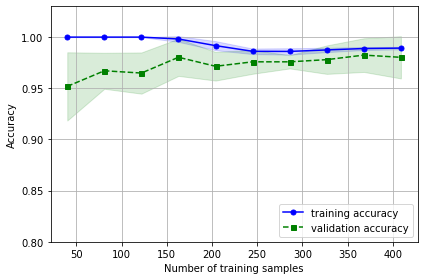

In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

#StandardScaler로 전처리 해주고
pipe_lr = make_pipeline(StandardScaler(),
                        LogisticRegression(solver='liblinear', 
                                           penalty='l2', 
                                           random_state=1))
#Pipe line으로 추정기!!
train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_lr,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)
#표준편차 확인
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.03])
plt.tight_layout()
plt.show()

초기 과대적합 상황인 것을 확인 가능

sample이 늘어날수록 과대적합이 잡힘(overfittng sol)

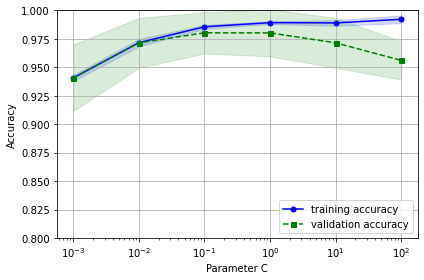

In [15]:
from sklearn.model_selection import validation_curve


param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
#np.logspace(-3, 2, 6)
#10^-3 ~ 10^2 까지 6개를 균등하게 나눠주는 함수
train_scores, test_scores = validation_curve(
                estimator=pipe_lr, 
                X=X_train, 
                y=y_train, 
                param_name='logisticregression__C', 
                param_range=param_range,
                cv=10)
#logisticregression__C => Pipeline의 객체를 접근하기 위함

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

plt.grid()
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter C')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.00])
plt.tight_layout()
plt.show()


규제 약해질수록 과대적합 상황이 생김(C의 증가 상황)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(),
                         SVC(random_state=1))

param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

param_grid = [{'svc__C': param_range, 
               'svc__kernel': ['linear']},
              {'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]
#svc__gamma라는 파라미터가 필요해서 커널을 튜플로 할 수 없다.

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  refit=True,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)
#refit의 의미? 최적의 매개변수를 찾으면 해당 매개변수로 모델을 만들고 훈련한다.

0.9846859903381642
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


In [17]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('테스트 정확도: %.3f' % clf.score(X_test, y_test))
#refit 때문에 필요는 없지만..

테스트 정확도: 0.974


In [19]:
gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

CV 정확도: 0.974 +/- 0.015


In [21]:
#각 폴드에 대한 점수가 궁금할 때! return_train_score를 하면 되고
#폴드마다 점수의 열람은 split#_train_score, #=폴드번호
#해당 점수 출력시 72개의 값이 출력되는데, 
#param grid를 참조하면, linear는 8개의 값을 참조한다.
#여기에, rbf의 경우 range와 gamma 모두 8개의 값이 존재하므로 64개 의 값이 되고,
#총 72개의 교차검증을 수행하게 되는 것.
#아래는 rbf 항에 대한 이해를 위해서 참고하면 좋을 것 같다.
#https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=sw4r&logNo=221497261535

gs = GridSearchCV(estimator=pipe_svc, 
                  param_grid=param_grid, 
                  scoring='accuracy', 
                  cv=10,
                  return_train_score=True,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
gs.cv_results_['split0_train_score']

array([0.6405868 , 0.93643032, 0.97555012, 0.98777506, 0.98533007,
       0.99266504, 0.99755501, 1.        , 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.62591687, 0.62591687, 0.62591687, 0.7799511 , 0.94621027,
       0.96577017, 0.62591687, 0.62591687, 0.62591687, 0.62591687,
       0.78484108, 0.94621027, 0.9804401 , 0.99266504, 1.        ,
       1.        , 1.        , 1.        , 0.94621027, 0.97799511,
       0.99266504, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97799511, 0.98777506, 0.99511002, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98533007,
       0.99266504, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [22]:
#전체 훈련 점수의 평균값이 필요한 경우
gs.cv_results_['mean_train_score']

array([0.6402928 , 0.93724074, 0.97240801, 0.98510406, 0.98803447,
       0.99145447, 0.99707019, 0.9992677 , 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.62637307, 0.62637307, 0.62637307, 0.77070249, 0.94700817,
       0.97167094, 0.62637307, 0.62637307, 0.62637307, 0.62637307,
       0.77949371, 0.94725326, 0.97704753, 0.99291848, 1.        ,
       1.        , 1.        , 1.        , 0.94652096, 0.97753354,
       0.99023257, 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.97680064, 0.98852287, 0.99755799, 1.        ,
       1.        , 1.        , 1.        , 1.        , 0.98803387,
       0.99291848, 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        ])

In [23]:
#최종 모델의 score, predict, transform 메서드를 바로 호출할 수 있다.
print('테스트 정확도: %.3f'%gs.score(X_test,y_test))

테스트 정확도: 0.974


단, 여기서 매개 변수 C 처럼 연속적인 값을 탐색해야하는 경우 RandomizedSearchCV가 더 효율적

n_iter로 탐색횟수를 조정할 수 있고, 샘플링 가능 한 분포를 지정해서 수행

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.fixes import loguniform
distribution = loguniform(0.0001, 1000.0)
param_dist=[{'svc__C':distribution,
             'svc__kernel':['linear']},
            {'svc__C':distribution,
             'svc__gamma':distribution,
             'svc__kernel':['rbf']}]
rs = RandomizedSearchCV(estimator=pipe_svc,
                        param_distributions=param_dist,
                        n_iter=30,
                        cv=10,
                        random_state=1,
                        n_jobs=-1)

rs = rs.fit(X_train, y_train)
print(rs.best_score_)
print(rs.best_params_)

0.9824637681159419
{'svc__C': 210.6644070836221, 'svc__gamma': 0.0006861724481510375, 'svc__kernel': 'rbf'}


사이킷런 0.24 버전에서 추가된 HalvingGridSearchCV는 모든 파라미터 조합에 대해 제한된 자원으로 실행한 후 가장 좋은 후보를 골라서 더 많은 자원을 투여하는 식으로 반복적으로 탐색 수행

이렇게 하나씩 하나씩 더 많은 자원을 투여하는 반식을 SH(Successive Halving) 이라고 부른다.

반복마다 늘려갈 자원을 정하는데 보통 Sample, 샘플의 갯수가 후보가 됨.

또한, 탐색 대상 모델에서 양의 정수 값을 가진 매개변수를 지정할 수 있다. (e.g. 랜덤 포레스트의 n_estimators...)

In [32]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
hgs = HalvingGridSearchCV(estimator=pipe_svc,
                          param_grid=param_grid,
                          cv=10,
                          n_jobs=-1, verbose=1)
hgs = hgs.fit(X_train, y_train)
print(hgs.best_score_)
print(hgs.best_params_)


n_iterations: 3
n_required_iterations: 4
n_possible_iterations: 3
min_resources_: 40
max_resources_: 455
aggressive_elimination: False
factor: 3
----------
iter: 0
n_candidates: 72
n_resources: 40
Fitting 10 folds for each of 72 candidates, totalling 720 fits
----------
iter: 1
n_candidates: 24
n_resources: 120
Fitting 10 folds for each of 24 candidates, totalling 240 fits
----------
iter: 2
n_candidates: 8
n_resources: 360
Fitting 10 folds for each of 8 candidates, totalling 80 fits
0.9775396825396825
{'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}


첫번째 반복 (iter : 0) 에서 72개의 후보를 40개의 샘플로 교차 검증 수행 => 24개의 후보를 선정

두번째 반복(iter : 1)에서 첫번째 반복을 통과한 24개의 후보를 120개의 샘플로 교차 검증 수행 => 이런 식으로 후보는 줄이고, 샘플의 갯수는 늘려나감

In [33]:
print(np.sum(hgs.cv_results_['mean_fit_time']))
#속도도 빠르다.

0.1083261489868164


In [34]:
print('자원 리스트 : ', hgs.n_resources_)
print('자원 리스트 : ', hgs.n_candidates_)
#이런 식으로 샘플 개수와 후보의 개수가 저장된다.

자원 리스트 :  [40, 120, 360]
자원 리스트 :  [72, 24, 8]


In [35]:
#중첩 교차 검증
#바깥쪽 루프 : 최적의 매개변수로 훈련
#안쪽 루프 : 훈련 데이터셋을 훈련/검증으로 나눠서 매개변수 튜닝

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV 정확도: 0.974 +/- 0.015


In [36]:
#결정트리와 비교
from sklearn.tree import DecisionTreeClassifier

gs = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0),
                  param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, None]}],
                  scoring='accuracy',
                  cv=2)

scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=5)
print('CV 정확도: %.3f +/- %.3f' % (np.mean(scores), 
                                      np.std(scores)))

CV 정확도: 0.934 +/- 0.016


In [37]:
#오차 행렬, TN, TP, FN, FT 등..

from sklearn.metrics import confusion_matrix

pipe_svc.fit(X_train, y_train)
y_pred = pipe_svc.predict(X_test)
confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)#여기에 labels=[1,0]을 붙이면 TP와 TN 위치 바꾸기 가능
print(confmat)

[[71  1]
 [ 2 40]]


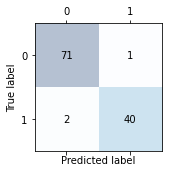

In [38]:
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
plt.show()

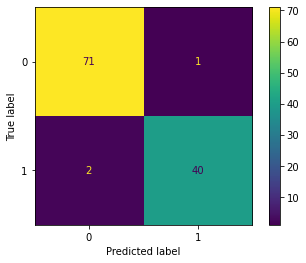

In [40]:
#confusionmatrix는 오차행렬을 쉽게 그릴 수 있게 해준다.
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test) #이렇게 모델을 주고 sample과 target값을 넘겨주면 알아서 나옴
plt.show()

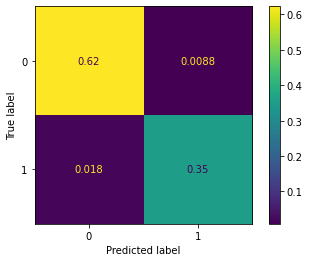

In [41]:
ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test, y_test, normalize='all')
#퍼센티지화!

정확도 PRE = TP / (TP+FP)

재현율 최적화 => 악성 종양 감지 못할 확률 최소화 (단, 건강한 환자임에도 악성 종양 예측 비용이 발생함)

재현율 REC = TP / (FN+TP)

정밀도 최적화 => 악성 종양을 가졌는지에 대해서 정확히 예측 (단, 악성 종양 환자를 자주 놓치는 결과를 초래)

둘을 합해서 조합평균(f1)도 많이 사용

조합평균 F1 = 2 * PRE * REC /(PRE+REC)

In [42]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('정밀도: %.3f' % precision_score(y_true=y_test, y_pred=y_pred))
print('재현율: %.3f' % recall_score(y_true=y_test, y_pred=y_pred))
print('F1: %.3f' % f1_score(y_true=y_test, y_pred=y_pred))

정밀도: 0.976
재현율: 0.952
F1: 0.964


In [43]:
from sklearn.metrics import make_scorer

scorer = make_scorer(f1_score, pos_label=0) #f1 score 사용

c_gamma_range = [0.01, 0.1, 1.0, 10.0]

param_grid = [{'svc__C': c_gamma_range,
               'svc__kernel': ['linear']},
              {'svc__C': c_gamma_range,
               'svc__gamma': c_gamma_range,
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc,
                  param_grid=param_grid,
                  scoring=scorer,
                  cv=10,
                  n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

#회귀 모델은 R^2, 분류모델은 Accuracy

0.9861994953378878
{'svc__C': 10.0, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}


ROC는 FPR과 TPR 점수를 기반으로 분류모델을 선택하는 유용한 도구

FRP = FP / (FP+FN), 거짓 양성 비율

TPR = TP / (FN+TP), 진짜 양성 비율

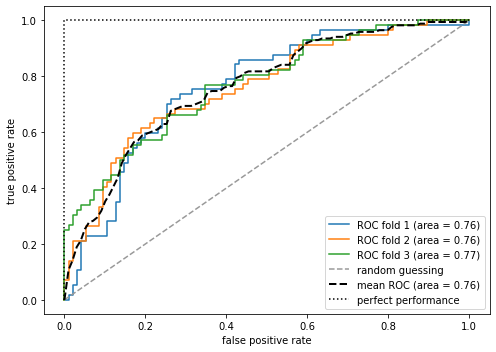

In [44]:
from sklearn.metrics import roc_curve, auc
from numpy import interp

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(solver='liblinear',
                                           penalty='l2', 
                                           random_state=1, 
                                           C=100.0))

X_train2 = X_train[:, [4, 14]]
    

cv = list(StratifiedKFold(n_splits=3, shuffle=True,
                          random_state=1).split(X_train, y_train))

fig = plt.figure(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))

plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing') #무작위로 분류 시 클래스별로 오차율이 비슷하게 되어 y=x의 직선이 된다.

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance') #이상 모델을 의미

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

TPR과 FPR 모두 1 => 거의 모든 샘플을 양성으로 판단

판단을 올바르게 했는가와 틀리게 했는가의 비율에 대한 그래프

휘어있는 의미?
이진 분류의 적절함을 의미한다 (좌상단에 붙어있을수록 잘 판단한 것)

그래프 위 점의 의미
Thresh 별 가능한 FPR과 TPR의 비율 => 좌상단에 붙어있을수록 좋은 모델인게, 딱 맞아 떨어지는 것
https://angeloyeo.github.io/2020/08/05/ROC.html

사이킷런 0.22 버전에서 plot_roc_curve() 함수와 plot_precision_recall_curve() 함수를 사용하면 ROC 곡선과 정밀도-재현율 곡선을 쉽게 그릴 수 있음.

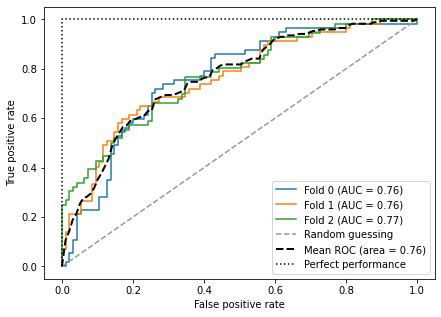

In [45]:
#모델과 함수를 전달해서 바로 객체를 반환하도록........ 평균을 쉽게 구할 수 있다.
# from sklearn.metrics import plot_roc_curve
from sklearn.metrics import RocCurveDisplay

fig, ax = plt.subplots(figsize=(7, 5))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    pipe_lr.fit(X_train2[train], y_train[train])
#     roc_disp = plot_roc_curve(pipe_lr, 
#                               X_train2[test], y_train[test], 
#                               name=f'Fold {i}', ax=ax)
    roc_disp = RocCurveDisplay.from_estimator(pipe_lr,
                                              X_train2[test], y_train[test], 
                                              name=f'Fold {i}', ax=ax)
    mean_tpr += interp(mean_fpr, roc_disp.fpr, roc_disp.tpr)
    mean_tpr[0] = 0.0

plt.plot([0, 1], [0, 1],
         linestyle='--', color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0, 0, 1], [0, 1, 1],
         linestyle=':', color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
# plt.savefig('images/06_plot_roc_curve.png', dpi=300)
plt.show()

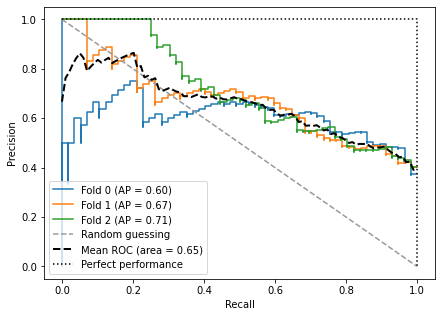

In [46]:
#정밀도-재현율 그래프

# from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

fig, ax = plt.subplots(figsize=(7, 5))

mean_precision = 0.0
mean_recall = np.linspace(0, 1, 100)

for i, (train, test) in enumerate(cv):
    pipe_lr.fit(X_train2[train], y_train[train])
    pr_disp = PrecisionRecallDisplay.from_estimator(
        pipe_lr, X_train2[test], y_train[test], 
        name=f'Fold {i}', ax=ax)
    mean_precision += interp(mean_recall, pr_disp.recall[::-1], 
                             pr_disp.precision[::-1])

plt.plot([0, 1], [1, 0],
         linestyle='--', color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_precision /= len(cv)
mean_auc = auc(mean_recall, mean_precision)
plt.plot(mean_recall, mean_precision, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)

plt.plot([0, 1, 1], [1, 1, 0],
         linestyle=':', color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc="lower left")
# plt.savefig('images/06_plot_precision_recall_curve.png', dpi=300)
#Thresh가 높으면 모두 양성으로 판단, 낮으면 모두 음성으로 판단.
plt.show()

https://github.com/rickiepark/python-machine-learning-book-3rd-edition/blob/master/ch06/ch06.ipynb
다중 분류 성능 지표 확인

In [47]:
# average 기본값 'binary'
pre_scorer = make_scorer(score_func=precision_score, 
                         pos_label=1, 
                         greater_is_better=True, 
                         average='micro')

샘플 수가 너무 불균형할 경우 중복을 허용하는 것도 좋다.

In [48]:
X_imb = np.vstack((X[y == 0], X[y == 1][:40]))
y_imb = np.hstack((y[y == 0], y[y == 1][:40]))

In [49]:
y_pred = np.zeros(y_imb.shape[0])
np.mean(y_pred == y_imb) * 100

89.92443324937027

In [50]:
from sklearn.utils import resample

print('샘플링하기 전 클래스 1의 샘플 개수:', X_imb[y_imb == 1].shape[0])

X_upsampled, y_upsampled = resample(X_imb[y_imb == 1],
                                    y_imb[y_imb == 1],
                                    replace=True,
                                    n_samples=X_imb[y_imb == 0].shape[0],
                                    random_state=123)
#replace를 true로 둬서 중복을 허용하여 sampling 하도록 한다.

print('샘플링하기 후 클래스 1의 샘플 개수:', X_upsampled.shape[0])

샘플링하기 전 클래스 1의 샘플 개수: 40
샘플링하기 후 클래스 1의 샘플 개수: 357


In [51]:
X_bal = np.vstack((X[y == 0], X_upsampled))
y_bal = np.hstack((y[y == 0], y_upsampled))

In [52]:
y_pred = np.zeros(y_bal.shape[0])
np.mean(y_pred == y_bal) * 100
#균형이 잡힌 것을 확인.

50.0